# 📍 Notebook 01 - Pengenalan Peta & Konsep Dasar

**Selamat datang!** Dalam notebook ini, kita akan mempelajari dasar-dasar peta digital dan cara menampilkannya menggunakan Python.

---

## 🎯 Tujuan Pembelajaran

Setelah menyelesaikan notebook ini, Anda akan dapat:
1. Memahami **sistem koordinat** (latitude & longitude)
2. Mengerti **proyeksi peta** (WGS84 / EPSG:4326)
3. Mengenal **jenis layer** (point, line, polygon)
4. Membuat **peta statis** menggunakan GeoPandas
5. Menampilkan data UMKM di peta

⏱️ **Estimasi waktu:** 30-45 menit

---

## 📚 Konsep Dasar yang Perlu Dipahami

### 1. Sistem Koordinat (Latitude & Longitude)

Setiap lokasi di Bumi bisa ditentukan dengan 2 angka:

- **Latitude (Lintang)**: Jarak dari khatulistiwa
  - Rentang: -90° (Kutub Selatan) sampai +90° (Kutub Utara)
  - Indonesia: sekitar -11° sampai +6°

- **Longitude (Bujur)**: Jarak dari meridian utama (Greenwich)
  - Rentang: -180° (barat) sampai +180° (timur)
  - Indonesia: sekitar 95° sampai 141°

**Contoh:**
- Surabaya: latitude -7.26°, longitude 112.74°
- Ditulis: (-7.26, 112.74) atau "7.26°S, 112.74°E"

> **💡 TIP:** Latitude ditulis **DULU**, baru longitude. Format: `(lat, lon)` atau `(Y, X)`

### 2. Proyeksi Peta (CRS - Coordinate Reference System)

Bumi itu bulat, tapi layar komputer itu datar. **Proyeksi** adalah cara mengubah permukaan bola menjadi bidang datar.

**WGS84 (EPSG:4326)** adalah proyeksi paling umum:
- Digunakan oleh GPS
- Format: latitude & longitude dalam derajat
- Cocok untuk peta global

> **📌 NOTE:** Ada banyak proyeksi lain (UTM, Mercator, dll), tapi untuk pemula WGS84 sudah cukup.

### 3. Jenis Layer (Geometri)

Data geospasial memiliki 3 bentuk dasar:

| Jenis | Deskripsi | Contoh |
|-------|-----------|--------|
| **Point** | Titik tunggal (lat, lon) | Lokasi toko, ATM, landmark |
| **Line** | Rangkaian titik yang terhubung | Jalan raya, sungai, pipa |
| **Polygon** | Area tertutup | Batas provinsi, danau, bangunan |

---

## 🛠️ Persiapan: Import Library & Load Data

Kita akan menggunakan:
- **GeoPandas**: untuk membaca & menampilkan peta
- **Pandas**: untuk membaca file CSV
- **Matplotlib**: untuk menggambar grafik/peta

In [5]:
# Import library yang diperlukan
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import os

# Setup path relatif (agar bisa dijalankan dari folder manapun)
# Cek apakah sedang di folder notebooks atau root
if 'notebooks' in os.getcwd():
    ROOT = Path('..')
else:
    ROOT = Path('.')

DATA_RAW = ROOT / 'data' / 'raw'
DATA_JEMBER_DIR = ROOT / 'data' / '35.09_Jember'
GEOJSON_KABUPATEN = DATA_JEMBER_DIR / '35.09_Jember.geojson'
GEOJSON_KECAMATAN = DATA_JEMBER_DIR / '35.09_kecamatan.geojson'
GEOJSON_KELURAHAN = DATA_JEMBER_DIR / '35.09_kelurahan.geojson'
CSV_FACILITIES = DATA_RAW / 'facilities_sample.csv'

print('✅ Library berhasil diimport!')
print(f'📂 Path GeoJSON Kabupaten: {GEOJSON_KABUPATEN}')
print(f'📂 Path GeoJSON Kecamatan: {GEOJSON_KECAMATAN}')
print(f'📂 Path GeoJSON Kelurahan: {GEOJSON_KELURAHAN}')
print(f'📂 Path CSV Fasilitas: {CSV_FACILITIES}')
print(f'\n📍 File exists:')
print(f'  Kabupaten: {GEOJSON_KABUPATEN.exists()}')
print(f'  Kecamatan: {GEOJSON_KECAMATAN.exists()}')
print(f'  Kelurahan: {GEOJSON_KELURAHAN.exists()}')
print(f'  CSV fasilitas: {CSV_FACILITIES.exists()}')

✅ Library berhasil diimport!
📂 Path GeoJSON Kabupaten: ../data/35.09_Jember/35.09_Jember.geojson
📂 Path GeoJSON Kecamatan: ../data/35.09_Jember/35.09_kecamatan.geojson
📂 Path GeoJSON Kelurahan: ../data/35.09_Jember/35.09_kelurahan.geojson
📂 Path CSV Fasilitas: ../data/raw/facilities_sample.csv

📍 File exists:
  Kabupaten: True
  Kecamatan: True
  Kelurahan: True
  CSV fasilitas: True


### Membaca Data Geospasial

Kita punya beberapa file data:
1. **GeoJSON Kabupaten** (35.09_Jember.geojson) - batas kabupaten Jember
2. **GeoJSON Kecamatan** (35.09_kecamatan.geojson) - batas kecamatan
3. **GeoJSON Kelurahan** (35.09_kelurahan.geojson) - batas kelurahan/desa
4. **CSV** (facilities_sample.csv) - data fasilitas publik (sekolah, rumah sakit, pasar, wisata, dsb.) dengan kolom lat/lon

In [6]:
# Membaca file GeoJSON - 3 level administrasi
# File besar (18MB untuk kelurahan), jadi akan memakan waktu ~10-30 detik
print('⏳ Membaca file GeoJSON (mungkin butuh 10-30 detik untuk file besar)...\n')

print('📍 Membaca Kabupaten...')
gdf_kabupaten = gpd.read_file(GEOJSON_KABUPATEN)
print(f'  ✓ Kabupaten: {len(gdf_kabupaten)} fitur')

print('📍 Membaca Kecamatan (9.3 MB)...')
gdf_kecamatan = gpd.read_file(GEOJSON_KECAMATAN)
print(f'  ✓ Kecamatan: {len(gdf_kecamatan)} fitur')

print('📍 Membaca Kelurahan (18 MB - ini yang paling lama)...')
gdf_kelurahan = gpd.read_file(GEOJSON_KELURAHAN)
print(f'  ✓ Kelurahan: {len(gdf_kelurahan)} fitur')

print('\n✅ Semua GeoJSON berhasil dimuat!')
print(f'   Kolom kabupaten: {gdf_kabupaten.columns.tolist()}')
print(f'   Kolom kecamatan: {gdf_kecamatan.columns.tolist()}')
print(f'   Kolom kelurahan: {gdf_kelurahan.columns.tolist()}')

# Membaca file CSV (data fasilitas publik) - ini cepat
df_facilities = pd.read_csv(CSV_FACILITIES)
print(f'\n🏥 Data fasilitas publik berhasil dimuat!')
print(f'   Jumlah fasilitas: {len(df_facilities)}')
print('\nContoh 5 baris pertama:')
df_facilities.head()

⏳ Membaca file GeoJSON (mungkin butuh 10-30 detik untuk file besar)...

📍 Membaca Kabupaten...
  ✓ Kabupaten: 1 fitur
📍 Membaca Kecamatan (9.3 MB)...
  ✓ Kecamatan: 31 fitur
📍 Membaca Kelurahan (18 MB - ini yang paling lama)...
  ✓ Kecamatan: 31 fitur
📍 Membaca Kelurahan (18 MB - ini yang paling lama)...
  ✓ Kelurahan: 248 fitur

✅ Semua GeoJSON berhasil dimuat!
   Kolom kabupaten: ['kd_propinsi', 'kd_dati2', 'nm_dati2', 'geometry']
   Kolom kecamatan: ['kd_propinsi', 'kd_dati2', 'kd_kecamatan', 'nm_kecamatan', 'geometry']
   Kolom kelurahan: ['kd_propinsi', 'kd_dati2', 'kd_kecamatan', 'kd_kelurahan', 'nm_kelurahan', 'geometry']

🏥 Data fasilitas publik berhasil dimuat!
   Jumlah fasilitas: 15

Contoh 5 baris pertama:
  ✓ Kelurahan: 248 fitur

✅ Semua GeoJSON berhasil dimuat!
   Kolom kabupaten: ['kd_propinsi', 'kd_dati2', 'nm_dati2', 'geometry']
   Kolom kecamatan: ['kd_propinsi', 'kd_dati2', 'kd_kecamatan', 'nm_kecamatan', 'geometry']
   Kolom kelurahan: ['kd_propinsi', 'kd_dati2', '

,id,nama,tipo,kecamatan,lat,lon,kapasitas
0,1,SDN Kaliwates 01,sekolah,Kaliwates,-8.1692,113.7021,300
1,2,SMPN 2 Jember,sekolah,Sumbersari,-8.1598,113.7199,600
2,3,RSU dr. Soebandi,ruma_sakit,Kaliwates,-8.1705,113.6902,120
3,4,Pasar Tanjung Pasar,perdagangan,Kaliwates,-8.1690,113.6980,200
4,5,Stasiun Ketapang (lokal),transportasi,Patrang,-8.1801,113.6650,0


> **💡 PENJELASAN:**
> - `gpd.read_file()` membaca file GeoJSON menjadi **GeoDataFrame** (seperti tabel + geometri)
> - `pd.read_csv()` membaca file CSV menjadi **DataFrame** biasa
> - Perhatikan perbedaan: GeoDataFrame punya kolom **geometry** untuk menyimpan bentuk (polygon/point/line)

### ⚡ Optimasi: Simplify Geometri untuk Performa Lebih Baik

File GeoJSON kelurahan sangat detail (18MB, 248 polygon). Untuk mempercepat plotting, kita akan **simplify** geometri dengan mengurangi jumlah titik koordinat sambil tetap mempertahankan bentuk visualnya.

In [7]:
# Simplify geometri untuk mempercepat plotting
# Tolerance: semakin besar = semakin sederhana (tapi kurang detail)
# Untuk kelurahan yang sangat detail, kita gunakan tolerance 0.001 (sekitar 100m)

print('⚡ Menyederhanakan geometri untuk performa lebih baik...')

# Simplify hanya untuk kelurahan (yang paling besar)
gdf_kelurahan_simple = gdf_kelurahan.copy()
gdf_kelurahan_simple['geometry'] = gdf_kelurahan_simple['geometry'].simplify(tolerance=0.001, preserve_topology=True)

# Opsional: simplify kecamatan juga jika masih lambat
gdf_kecamatan_simple = gdf_kecamatan.copy()
gdf_kecamatan_simple['geometry'] = gdf_kecamatan_simple['geometry'].simplify(tolerance=0.0005, preserve_topology=True)

print('✅ Geometri berhasil disederhanakan!')
print(f'   Kelurahan: dari {len(gdf_kelurahan)} → {len(gdf_kelurahan_simple)} fitur (geometri lebih sederhana)')
print(f'   Kecamatan: dari {len(gdf_kecamatan)} → {len(gdf_kecamatan_simple)} fitur (geometri lebih sederhana)')
print('\n💡 TIP: Gunakan versi _simple untuk plotting yang lebih cepat!')

⚡ Menyederhanakan geometri untuk performa lebih baik...
✅ Geometri berhasil disederhanakan!
   Kelurahan: dari 248 → 248 fitur (geometri lebih sederhana)
   Kecamatan: dari 31 → 31 fitur (geometri lebih sederhana)

💡 TIP: Gunakan versi _simple untuk plotting yang lebih cepat!
✅ Geometri berhasil disederhanakan!
   Kelurahan: dari 248 → 248 fitur (geometri lebih sederhana)
   Kecamatan: dari 31 → 31 fitur (geometri lebih sederhana)

💡 TIP: Gunakan versi _simple untuk plotting yang lebih cepat!


## 🌍 Memahami CRS (Coordinate Reference System)

Setiap GeoDataFrame memiliki **CRS** - sistem koordinat yang digunakan.

**Kenapa penting?**
- Data dari sumber berbeda bisa pakai CRS berbeda
- Harus sama CRS-nya untuk bisa di-overlay (ditumpuk)
- GeoPandas bisa mengkonversi dengan `.to_crs()`

Mari kita cek CRS dari data kita:

## 🗺️ Menampilkan Peta Statis Pertama

Sekarang kita akan **menggambar peta** menggunakan GeoPandas!

> **📌 CATATAN PENTING:**
> - **EPSG:4326** = WGS84 (koordinat lat/lon dalam derajat)
> - Ini adalah CRS paling umum untuk peta web dan GPS
> - Jika suatu saat perlu reproyeksi, gunakan: `gdf.to_crs('EPSG:XXXX')`

In [8]:
# Cek CRS dari semua GeoDataFrame
print('📐 CRS dari peta:')
print(f'  Kabupaten: {gdf_kabupaten.crs}')
print(f'  Kecamatan: {gdf_kecamatan.crs}')
print(f'  Kelurahan: {gdf_kelurahan.crs}')

# Set CRS jika belum ada
for gdf, name in [(gdf_kabupaten, 'Kabupaten'), (gdf_kecamatan, 'Kecamatan'), (gdf_kelurahan, 'Kelurahan')]:
    if gdf.crs is None:
        gdf.set_crs('EPSG:4326', inplace=True)
        print(f'✅ CRS {name} sudah diatur ke EPSG:4326')

📐 CRS dari peta:
  Kabupaten: EPSG:4979
  Kecamatan: EPSG:4979
  Kelurahan: EPSG:4979


/tmp/ipykernel_22023/196497464.py:26: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/juni/Praktikum/datavis/datavis-geospasial/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/juni/Praktikum/datavis/datavis-geospasial/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


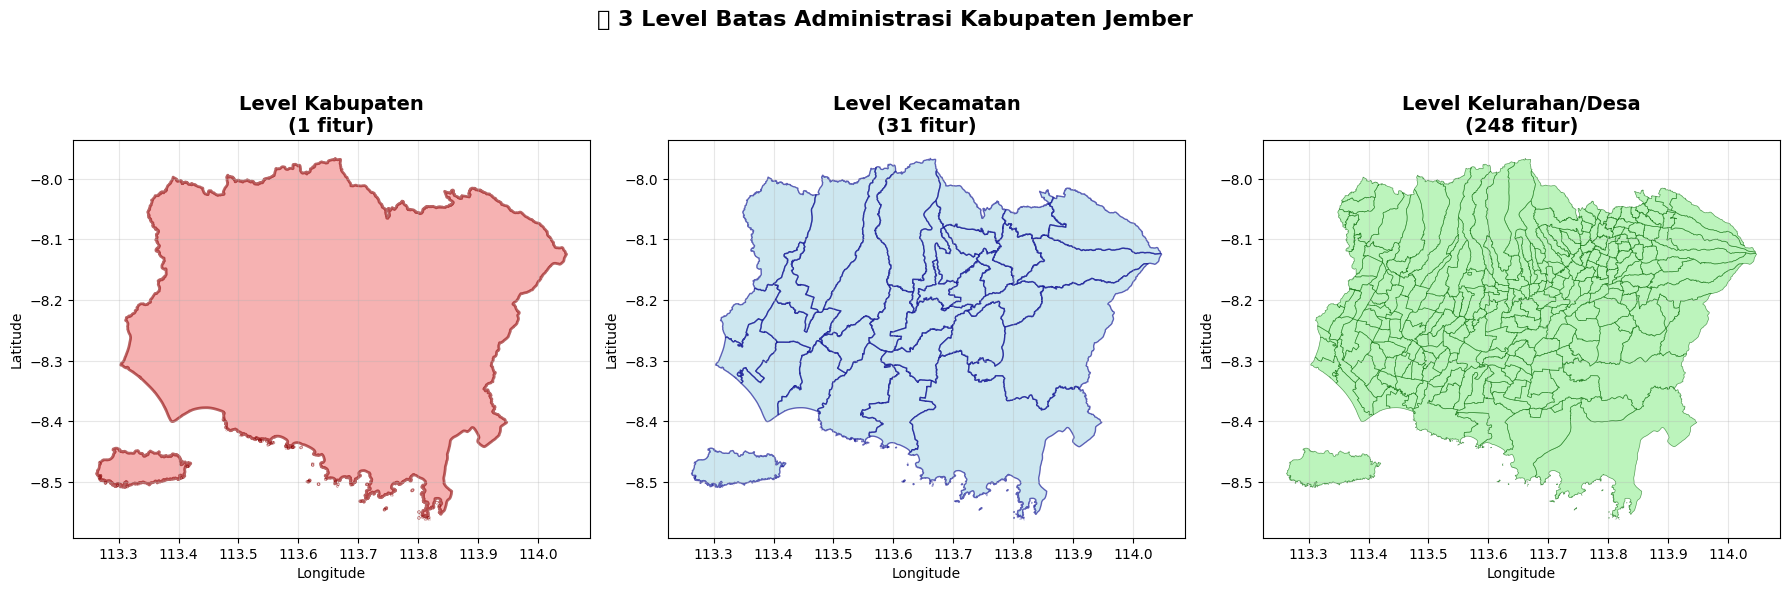

✅ Semua level peta berhasil ditampilkan!


In [9]:
# Membuat 3 subplot untuk menampilkan 3 level peta
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot 1: Batas Kabupaten
gdf_kabupaten.plot(ax=axes[0], color='lightcoral', edgecolor='darkred', linewidth=2, alpha=0.6)
axes[0].set_title(f'Level Kabupaten\n({len(gdf_kabupaten)} fitur)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].grid(True, alpha=0.3)

# Plot 2: Batas Kecamatan
gdf_kecamatan.plot(ax=axes[1], color='lightblue', edgecolor='darkblue', linewidth=1, alpha=0.6)
axes[1].set_title(f'Level Kecamatan\n({len(gdf_kecamatan)} fitur)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].grid(True, alpha=0.3)

# Plot 3: Batas Kelurahan/Desa
gdf_kelurahan.plot(ax=axes[2], color='lightgreen', edgecolor='darkgreen', linewidth=0.5, alpha=0.6)
axes[2].set_title(f'Level Kelurahan/Desa\n({len(gdf_kelurahan)} fitur)', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Longitude')
axes[2].set_ylabel('Latitude')
axes[2].grid(True, alpha=0.3)

plt.suptitle('📍 3 Level Batas Administrasi Kabupaten Jember', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print('✅ Semua level peta berhasil ditampilkan!')

> **💡 PENJELASAN LEVEL ADMINISTRASI:**
> 1. **Kabupaten** (kiri) - 1 polygon untuk seluruh Kabupaten Jember
> 2. **Kecamatan** (tengah) - Subdivisi kabupaten, biasanya 20-30 kecamatan
> 3. **Kelurahan/Desa** (kanan) - Subdivisi kecamatan, jumlah paling banyak
> 
> Semakin detail level administrasi, semakin banyak polygon dan garis batas yang terlihat!

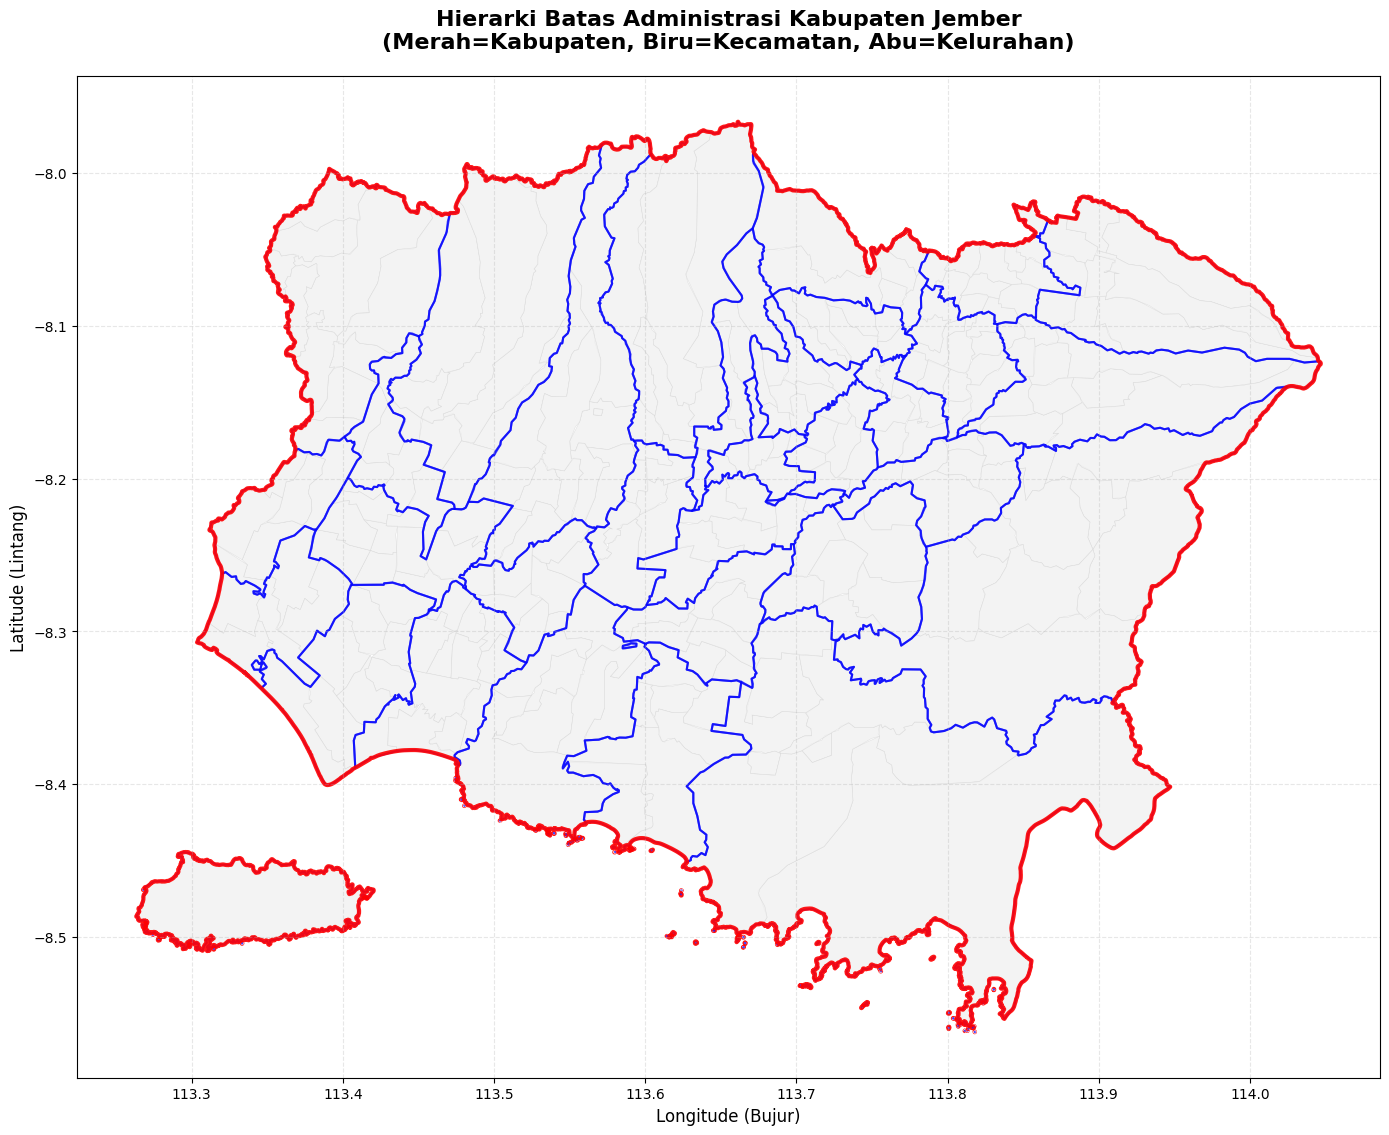

✅ Peta overlay semua level berhasil ditampilkan!
🔴 Merah = Batas Kabupaten (1 polygon)
🔵 Biru = Batas Kecamatan (31 polygon)
⚪ Abu-abu = Batas Kelurahan (248 polygon)


In [10]:
# Overlay semua level dalam 1 peta (menggunakan versi simplified untuk performa)
fig, ax = plt.subplots(figsize=(14, 12))

# Layer 1: Kelurahan (paling detail, background) - gunakan versi simplified
gdf_kelurahan_simple.plot(ax=ax, color='#f0f0f0', edgecolor='lightgray', linewidth=0.3, alpha=0.8)

# Layer 2: Kecamatan (garis lebih tebal) - gunakan versi simplified
gdf_kecamatan_simple.plot(ax=ax, facecolor='none', edgecolor='blue', linewidth=1.5, alpha=0.7)

# Layer 3: Kabupaten (garis paling tebal)
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='red', linewidth=3, alpha=0.9)

ax.set_title('Hierarki Batas Administrasi Kabupaten Jember\n(Merah=Kabupaten, Biru=Kecamatan, Abu=Kelurahan)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (Bujur)', fontsize=12)
ax.set_ylabel('Latitude (Lintang)', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('✅ Peta overlay semua level berhasil ditampilkan!')
print(f'🔴 Merah = Batas Kabupaten ({len(gdf_kabupaten)} polygon)')
print(f'🔵 Biru = Batas Kecamatan ({len(gdf_kecamatan_simple)} polygon)')
print(f'⚪ Abu-abu = Batas Kelurahan ({len(gdf_kelurahan_simple)} polygon)')

### Menampilkan Overlay Semua Level

Kita juga bisa menampilkan semua level sekaligus untuk melihat hierarki administrasi:

## 🎓 Menampilkan Data Fasilitas sebagai Titik (Point)

Sekarang kita akan mengubah data CSV fasilitas menjadi **GeoDataFrame** dan menampilkan lokasi fasilitas publik di peta!

### Konsep: Dari Tabel ke Peta

Data fasilitas punya kolom `lat` dan `lon` → kita konversi jadi **geometri Point** → bisa ditampilkan di peta!

**Langkah:**
1. Ambil kolom lat & lon
2. Buat geometri Point menggunakan `gpd.points_from_xy()`
3. Gabungkan dengan data asli → jadilah GeoDataFrame

### Menampilkan Peta + Titik UMKM

Sekarang kita akan **overlay** (tumpuk) polygon Jatim dengan titik UMKM:

> **💡 PERHATIKAN:**
> - Kolom `geometry` sekarang berisi objek **POINT (lon lat)**
> - Format POINT: `POINT (longitude latitude)` ← urutan terbalik dari biasanya!
> - Ini normal di standar geospasial (X, Y) = (lon, lat)

In [11]:
# Konversi DataFrame biasa menjadi GeoDataFrame untuk fasilitas
gdf_facilities = gpd.GeoDataFrame(
    df_facilities,  # data asli
    geometry=gpd.points_from_xy(df_facilities.lon, df_facilities.lat),  # buat geometri Point
    crs='EPSG:4326'  # set CRS
)

print('✅ Data fasilitas berhasil dikonversi menjadi GeoDataFrame!')
print(f'Jumlah titik: {len(gdf_facilities)}')
print('\nContoh data dengan kolom geometry:')
gdf_facilities[['nama', 'kecamatan', 'tipo', 'geometry']].head()

✅ Data fasilitas berhasil dikonversi menjadi GeoDataFrame!
Jumlah titik: 15

Contoh data dengan kolom geometry:


,nama,kecamatan,tipo,geometry
0,SDN Kaliwates 01,Kaliwates,sekolah,POINT (113.7021 -8.1692)
1,SMPN 2 Jember,Sumbersari,sekolah,POINT (113.7199 -8.1598)
2,RSU dr. Soebandi,Kaliwates,ruma_sakit,POINT (113.6902 -8.1705)
3,Pasar Tanjung Pasar,Kaliwates,perdagangan,POINT (113.698 -8.169)
4,Stasiun Ketapang (lokal),Patrang,transportasi,POINT (113.665 -8.1801)


In [ ]:
# Buat peta dengan kecamatan + titik fasilitas
fig, ax = plt.subplots(figsize=(14, 12))

# Layer 1: Batas Kecamatan (background)
gdf_kecamatan.plot(ax=ax, color='lightgray', edgecolor='gray', linewidth=0.8, alpha=0.5)

# Layer 2: Batas Kabupaten (outline tebal)
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

# Layer 3: Titik fasilitas dengan warna berdasarkan 'tipo'
gdf_facilities.plot(
    ax=ax, 
    column='tipo',      # kolom untuk warna
    categorical=True,    # data kategorikal (bukan numerik)
    legend=True,         # tampilkan legenda
    markersize=120,      # ukuran titik
    cmap='Set2',         # palet warna
    edgecolor='black',   # garis tepi titik
    linewidth=0.5,
    alpha=0.9            # transparansi
)

# Tambahkan judul
ax.set_title('Sebaran Fasilitas Publik di Kabupaten Jember\n(dengan Batas Kecamatan)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude (Bujur)', fontsize=12)
ax.set_ylabel('Latitude (Lintang)', fontsize=12)

# Tampilkan grid untuk memudahkan baca koordinat
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('\n✅ Peta overlay fasilitas berhasil ditampilkan!')
print(f'📊 Jumlah kecamatan: {len(gdf_kecamatan)}')
print(f'? Jumlah fasilitas: {len(gdf_facilities)}')

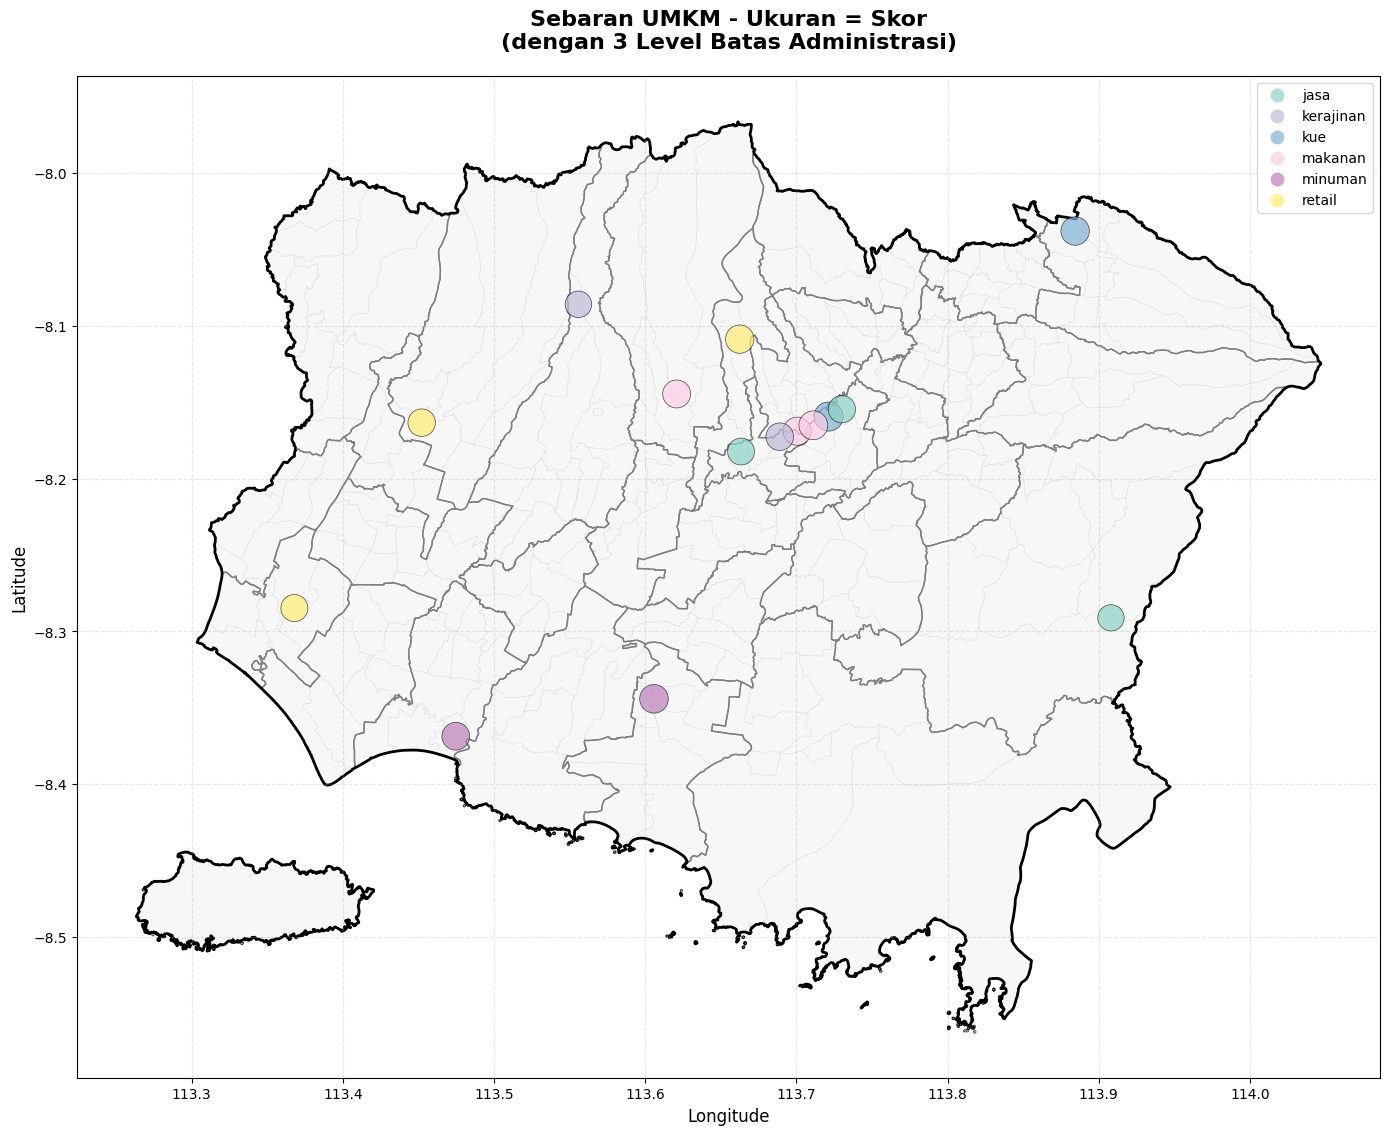

✅ Semakin besar titik = skor semakin tinggi!
📊 Ditampilkan: 248 kelurahan, 31 kecamatan, 1 kabupaten


In [ ]:
# Latihan 2: Peta dengan ukuran titik berdasarkan kapasitas + layer kelurahan
fig, ax = plt.subplots(figsize=(14, 12))

# Background: Batas Kelurahan (paling detail) - gunakan versi simplified untuk lebih cepat
gdf_kelurahan_simple.plot(ax=ax, color='#f5f5f5', edgecolor='lightgray', linewidth=0.3, alpha=0.7)

# Layer 2: Batas Kecamatan - gunakan versi simplified
gdf_kecamatan_simple.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)

# Layer 3: Batas Kabupaten
gdf_kabupaten.plot(ax=ax, facecolor='none', edgecolor='black', linewidth=2)

# Layer 4: Titik fasilitas dengan ukuran proporsional kapasitas
gdf_facilities.plot(
    ax=ax,
    column='tipo',
    categorical=True,
    legend=True,
    markersize=gdf_facilities['kapasitas'] * 0.5,  # skala agar tidak terlalu besar
    cmap='Set2',
    edgecolor='black',
    linewidth=0.5,
    alpha=0.8
)

ax.set_title('Sebaran Fasilitas - Ukuran = Kapasitas\n(dengan 3 Level Batas Administrasi)', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print('✅ Semakin besar titik = kapasitas fasilitas semakin besar!')
print(f'📊 Ditampilkan: {len(gdf_kelurahan_simple)} kelurahan, {len(gdf_kecamatan_simple)} kecamatan, 1 kabupaten')

### Jawaban Latihan 2:

In [ ]:
# Latihan 1: Analisis per kecamatan untuk fasilitas
print('📊 ANALISIS FASILITAS PER KECAMATAN\n')

# Hitung jumlah fasilitas dan rata-rata kapasitas per kecamatan
ringkasan = df_facilities.groupby('kecamatan').agg({
    'id': 'count',        # hitung jumlah fasilitas
    'kapasitas': 'mean'   # rata-rata kapasitas
}).rename(columns={'id': 'jumlah_fasilitas', 'kapasitas': 'rata_rata_kapasitas'})

# Urutkan berdasarkan jumlah (descending)
ringkasan = ringkasan.sort_values('jumlah_fasilitas', ascending=False)

print(ringkasan)
print(f'\n✅ Total fasilitas: {df_facilities.shape[0]}')
print(f'✅ Kecamatan dengan fasilitas terbanyak: {ringkasan.index[0]} ({ringkasan.iloc[0]["jumlah_fasilitas"]} fasilitas)')

📊 ANALISIS UMKM PER KOTA

        jumlah_umkm  rata_rata_skor
kota                               
Jember           15       79.933333

✅ Total UMKM: 15
✅ Kota dengan UMKM terbanyak: Jember (15.0 UMKM)


## 📋 Jawaban Latihan

### Jawaban Latihan 1:

---

## ✍️ LATIHAN MANDIRI

Sekarang giliran Anda mencoba! Kerjakan 2 latihan berikut:

### **Latihan 1: Analisis Sederhana** (mudah)

Tampilkan tabel yang menunjukkan:
- Jumlah UMKM per kota
- Rata-rata skor per kota

**Hint:** Gunakan `groupby()` dan `agg()`

---

### **Latihan 2: Visualisasi Ukuran Titik** (menengah)

Buat peta seperti di atas, tapi:
- Ukuran titik proporsional dengan **skor** (skor tinggi = titik besar)
- Warna tetap berdasarkan **jenis**

**Hint:** Gunakan parameter `markersize=gdf_umkm['skor']`

---

> **📝 Silakan coba dulu sebelum lihat jawaban di bawah!**

> **💡 TIPS VISUALISASI:**
> - `column='jenis'` → warna otomatis berdasarkan kategori
> - `markersize` → ubah ukuran titik (coba 50, 100, 200)
> - `cmap` → palet warna (coba: 'tab10', 'Pastel1', 'Set2')
> - `alpha` → transparansi (0.5 = semi-transparan, 1.0 = solid)

---

## 🎉 Selamat!

Anda telah menyelesaikan Notebook 01 dan mempelajari:
- ✅ Sistem koordinat (lat/lon)
- ✅ Proyeksi peta (CRS/EPSG:4326)
- ✅ Jenis layer (point, line, polygon)
- ✅ Membuat peta statis dengan GeoPandas menggunakan data riil Kabupaten Jember
- ✅ Overlay beberapa layer (polygon kecamatan + point UMKM)
- ✅ Visualisasi dengan warna dan ukuran

---

## 🚀 Lanjut ke Notebook 02

Di notebook berikutnya, kita akan membuat **peta interaktif** menggunakan:
- **Folium** (marker, popup, cluster)
- **Plotly** (scatter mapbox, tooltips)

Peta interaktif bisa di-zoom, di-klik, dan lebih menarik!

**Buka:** `02_alat_visualisasi_geospasial.ipynb`

---

> **📌 CATATAN:**
> - Data Kabupaten Jember adalah data riil dengan batas-batas kecamatan yang detail
> - Data UMKM adalah sample untuk pembelajaran
> - Untuk proyek riil, Anda bisa menggunakan data geospasial dari Natural Earth, OSM, atau Data.go.id
> - Notebook ini bisa berjalan **tanpa internet** (kecuali saat install paket)